In [262]:
import pandas as pd

In [263]:
df = pd.read_csv("Data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [264]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [265]:
df.shape

(1025, 14)

In [266]:
df2 = df.drop_duplicates()


In [267]:
df2.shape

(302, 14)

In [268]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### model building

In [269]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from keras.optimizers import SGD

from sklearn.model_selection import train_test_split



In [270]:
X = df2.drop("target",axis= 1)
Y = df2["target"]
print(X.shape,Y.shape)

(302, 13) (302,)


In [280]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (241, 13)
Shape of x_valid:  (61, 13)
Shape of y_train:  (241,)
Shape of y_valid:  (61,)


In [295]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [296]:
# model building
model = Sequential()
model.add(Dense(1, activation = 'relu', input_shape = (13, )))
# model.add(Dense(8, activation='relu'))
   
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_123 (Dense)           (None, 1)                 14        
                                                                 
 dense_124 (Dense)           (None, 1)                 2         
                                                                 
Total params: 16 (64.00 Byte)
Trainable params: 16 (64.00 Byte)


Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [297]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer= opt ,loss='binary_crossentropy',metrics=['acc'])

In [298]:
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<0.1):
            print("\nReached 0.1 val_loss so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()

In [299]:
history = model.fit(x_train, y_train, epochs=50,batch_size=1, callbacks=[callback],validation_data=(x_test,y_test),verbose=1)

Epoch 1/50
241/241 [==============================] - 1s 4ms/step - loss: 1.0076 - acc: 0.3942 - val_loss: 1.0593 - val_acc: 0.3934
Epoch 2/50
241/241 [==============================] - 1s 4ms/step - loss: 0.8653 - acc: 0.4647 - val_loss: 0.9063 - val_acc: 0.4918
Epoch 3/50
241/241 [==============================] - 1s 3ms/step - loss: 0.7738 - acc: 0.5353 - val_loss: 0.8001 - val_acc: 0.5574
Epoch 4/50
241/241 [==============================] - 1s 3ms/step - loss: 0.7134 - acc: 0.5892 - val_loss: 0.7323 - val_acc: 0.6066
Epoch 5/50
241/241 [==============================] - 1s 4ms/step - loss: 0.6732 - acc: 0.6432 - val_loss: 0.6895 - val_acc: 0.6557
Epoch 6/50
241/241 [==============================] - 1s 4ms/step - loss: 0.6441 - acc: 0.6722 - val_loss: 0.6585 - val_acc: 0.6393
Epoch 7/50
241/241 [==============================] - 1s 4ms/step - loss: 0.6238 - acc: 0.7012 - val_loss: 0.6271 - val_acc: 0.7049
Epoch 8/50
241/241 [==============================] - 1s 4ms/step - loss: 0.

In [300]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


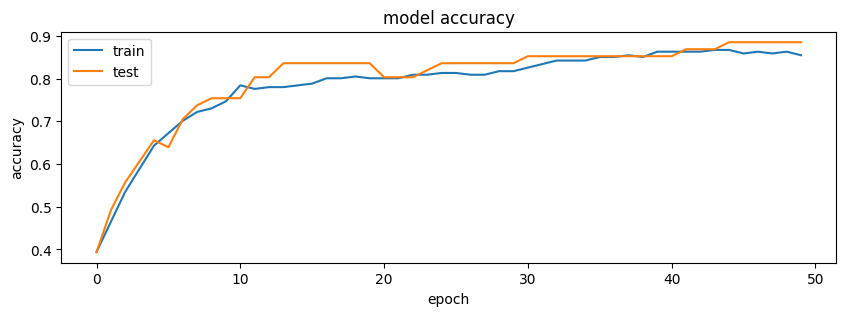

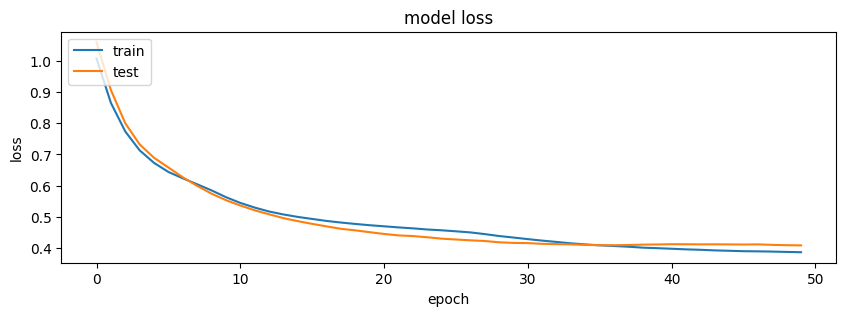

In [408]:
# DISPLAYING MODEL TRAINING HISTORY

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.figure(figsize=(10,3))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(10,3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [302]:
# Evaluate the model on test dataset
loss, acc = model.evaluate(x_test,y_test,verbose=1)
print(f'Test loss: {loss*100} %')
print(f'Test Accuracy: {acc*100} %')

2/2 [==============================] - 0s 6ms/step - loss: 0.4091 - acc: 0.8852
Test loss: 40.913450717926025 %
Test Accuracy: 88.52459192276001 %


In [305]:
pred_test = model.predict(x_test)
for i in range (len(pred_test)):
    if (pred_test[i] < 0.5):
        pred_test[i] = 0
    else:
        pred_test[i] = 1
pred_test = pred_test.astype(int)


2/2 [==============================] - 0s 4ms/step


In [306]:
import numpy as np  
def view_result(array):
    array = np.array(array)
    for i in range(len(array)):
        if array[i] == 0:
            print("No Disease")
        else:
            print("Disease detacted")

print("PREDICTED : ")
view_result(pred_test[:10])
print("\n")
print("ACTUAL : ")
view_result(y_test[:10])

PREDICTED : 
Disease detacted
No Disease
No Disease
No Disease
Disease detacted
Disease detacted
Disease detacted
Disease detacted
Disease detacted
Disease detacted


ACTUAL : 
Disease detacted
No Disease
No Disease
No Disease
Disease detacted
Disease detacted
Disease detacted
Disease detacted
Disease detacted
Disease detacted


In [307]:
model.save("./Data/Prediction_model.h5")

c:\Users\Aman\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [393]:
x = df2.sample()

s = model.predict(x.drop("target",axis=1))
print(s)
if s < 0.5:
    print("No Desease")
else:
    print("Deasease Detacted")
x

1/1 [==============================] - 0s 50ms/step
[[4.750766e-11]]
No Desease


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
237,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0


In [407]:
x = df2.sample()
s = model.predict(x.drop("target",axis=1))
print(s)
if s < 0.5:
    print("No Desease")
else:
    print("Deasease Detacted")
x

1/1 [==============================] - 0s 26ms/step
[[0.800677]]
Deasease Detacted


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
24,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
